In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from ImpactAtmosphere import LakeAfterImpact

In [2]:
T_surf = 280 # surface and ocean temperature
pH_ocean = 7 # ocean pH
T_lake = 280 # lake temperature
pH_lake = 7 # lake pH

# There are most important parameters
lc = LakeAfterImpact(T_surf,pH_ocean,T_lake,pH_lake)

In [5]:
# initial conditions
init_dict = {'H2': 298.9,
             'CO': 0.0562,
             'CO2': 22.9,
             'CH4': 0.0166,
             'N2': 35.96,
             'NH3': 0.0}

out = lc.integrate(init_dict)

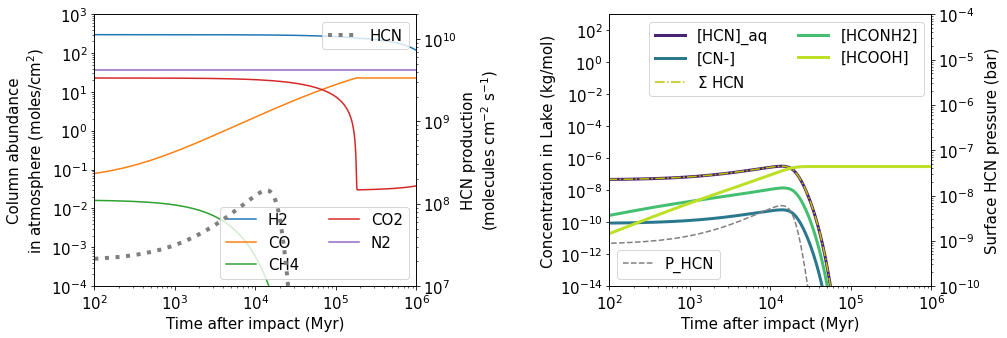

In [4]:
plt.rcParams.update({'font.size': 15})
fig,[ax,ax1] = plt.subplots(1,2,figsize=[15,5])
spec = ['H2','CO','CH4','CO2','N2']
yr = 60*60*24*365
for sp in spec:
    ax.plot(out['time']/yr,out[sp]*out['Ntot'],'-',label=sp)
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-4,1000)
ax.set_xlim(1e2,1e6)
ax.set_ylabel('Column abundance\nin atmosphere (moles/cm$^2$)')
ax.set_xlabel('Time after impact (Myr)')
ax.legend(ncol=2)

ax2 = ax.twinx()
ax2.set_ylabel('HCN production\n(molecules cm$\mathrm{^{-2}}$ s$\mathrm{^{-1}}$)')  # we already handled the x-label with ax1
ax2.plot(out['time']/yr, out['dNHCN_dt'],'C7:',lw=4,label='HCN')
ax2.set_yscale('log')
ax2.legend()
ax2.set_ylim(1e7,2e10)


# plot lake stuff
ax1.plot(out['time']/yr,out['HCN_aq_lake'],color=cm.viridis(0.1),label='[HCN]_aq',lw=3)
ax1.plot(out['time']/yr,out['CN_lake'],'-',color=cm.viridis(0.4),label='[CN-]',lw=3)
ax1.plot(out['time']/yr,out['sumHCN_lake'],color='y',label='$\Sigma$ HCN',lw=1.5,ls='-.')
ax1.plot(out['time']/yr,out['HCONH2_lake'],color=cm.viridis(0.7),label='[HCONH2]',lw=3)
ax1.plot(out['time']/yr,out['HCOOH_lake'],color=cm.viridis(0.9),label='[HCOOH]',lw=3)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(1e2,1e6)
ax1.set_ylim(1e-14,1e3)
ax1.set_ylabel('Concentration in Lake (kg/mol)')
ax1.set_xlabel('Time after impact (Myr)')
ax1.legend(ncol=2,loc=1)

ax3 = ax1.twinx()
ax3.plot(out['time']/yr,out['PHCN'],'C7--',label='P_HCN')
ax3.set_ylim(1e-10,1e-4)
ax3.set_yscale('log')
ax3.legend(ncol=2,loc=3)
ax3.set_ylabel('Surface HCN pressure (bar)')

plt.subplots_adjust(wspace=.6)

plt.show()